In [1]:
!python --version

Python 3.10.12


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd /content/gdrive/MyDrive/flowers/

/content/gdrive/MyDrive/flowers


In [4]:
# !unzip /content/gdrive/MyDrive/flowers/data_2.zip

Archive:  /content/gdrive/MyDrive/flowers/data_2.zip
replace data_2/1/image_06734.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
!pip install pandas

In [6]:
import numpy as np
import os
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import pandas as pd

In [7]:
dataDir='/content/gdrive/MyDrive/flowers/data_2/'
classes = [str(i) for i in range(1, 103)]

In [8]:
os.walk(dataDir)

<generator object _walk at 0x7dbab1202b20>

In [9]:
# Hàm thống kê số lượng ảnh của mỗi lớp
def statistic(dataDir):
    label = []
    num_images = []
    for lab in os.listdir(dataDir):
        label.append(lab)
        files=os.listdir(os.path.join(dataDir, lab))
        c=len(files)
        num_images.append(c)
    return label, num_images

In [10]:
# Hiển thị thống kê
labels, num_images = statistic(dataDir)
print(labels)
print(num_images)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
[40, 45, 49, 58, 48, 87, 87, 49, 48, 49, 41, 85, 82, 49, 60, 56, 40, 59, 91, 42, 41, 41, 40, 66, 78, 40, 85, 52, 45, 46, 40, 43, 75, 108, 56, 41, 56, 67, 127, 59, 130, 93, 40, 196, 67, 71, 49, 65, 92, 258, 85, 93, 61, 71, 109, 67, 114, 67, 45, 109, 50, 55, 54, 52, 102, 61, 42, 54, 54, 40, 62, 78, 96, 194, 171, 120, 107, 251, 137, 41, 85, 105, 166, 112, 131, 86, 63, 58, 63, 154, 184, 46, 82,

In [11]:
def LoadData(dataDir,new_size=None):
    if not new_size is None:
        img_rows, img_cols = new_size
    classes=[]
    for _,dirs,_ in os.walk(dataDir):
        classes=dirs
        break
    num_classes=len(classes)
    ValidPercent=30
    X_tr=[]
    Y_tr=[]
    X_te=[]
    Y_te=[]
    for idx,cl in enumerate(classes):
        for _,_,files in os.walk(dataDir+cl+'/'):
            l=len(files)
            for f in files:
                r=np.random.randint(100)
                img_path=dataDir+cl+'/'+f
                img=cv.imread(img_path)
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                if not new_size is None:
                    img=cv.resize(img,(img_rows,img_cols))
                if (r>ValidPercent):
                    X_tr.append(img)
                    Y_tr.append(int(cl[0]))
                else:
                    X_te.append(img)
                    Y_te.append(int(cl[0]))
#     X_tr=np.array(X_tr)
#     Y_tr=np.array(Y_tr)
#     X_va=np.array(X_va)
#     Y_va=np.array(Y_va)
    return X_tr, Y_tr, X_te, Y_te

In [12]:
# new_size=(224,224)
img_train,label_train, img_test, label_test=LoadData(dataDir,None)

img for train: 5614
label for train: 5614
img for test: 2575
label for test: 2575


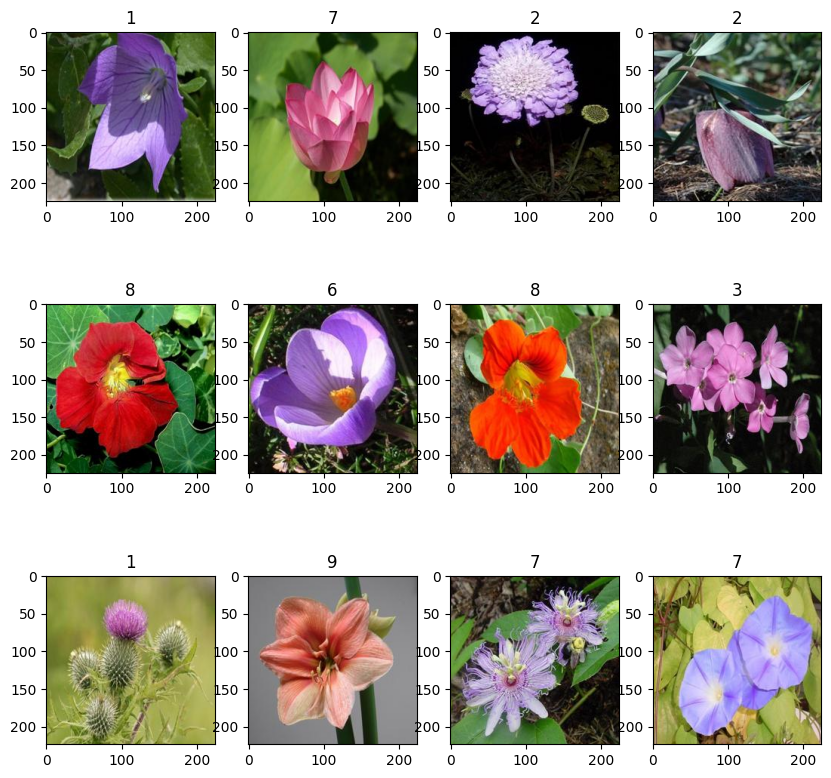

In [13]:
"""
Hiển thị một số thông tin của tập dữ liệu
"""
print("img for train: %d" % (len(img_train)))
print("label for train: %d" % (len(label_train)))

print("img for test: %d" % (len(img_test)))
print("label for test: %d" % (len(label_test)))

"""
Hiển thị một số ảnh trong tập huấn luyện
"""

idxs=np.random.permutation(len(img_train))
plt.figure(figsize = (10,10))
for i in range(12):  # Lấy ngẫu nhiên 12 mẫu trong tập train
    idx=idxs[i]
    plt.subplot(3,4,i+1)
    plt.imshow(img_train[idx],norm=NoNorm())
    #plt.title(labels[label_train[idx]])
    plt.title(label_train[idx])
plt.show()

In [14]:
import cv2
from skimage.feature import hog

def get_hog_features(img, orient=9, pix_per_cell=8, cell_per_block=2,
                     vis=False, feature_vec=True):

    # Convert to grayscale if image is RGB
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    if vis==True:
        features, hog_image = hog(img,  orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True,
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True,
                       feature_vector=feature_vec)
        return features

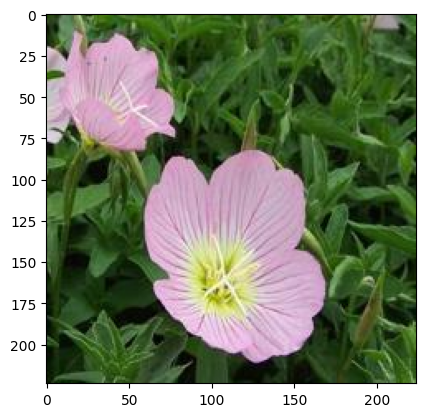

In [15]:
plt.imshow(img_train[0],norm=NoNorm())

In [16]:
feature, img_hogg =get_hog_features(img_train[0], vis=True)

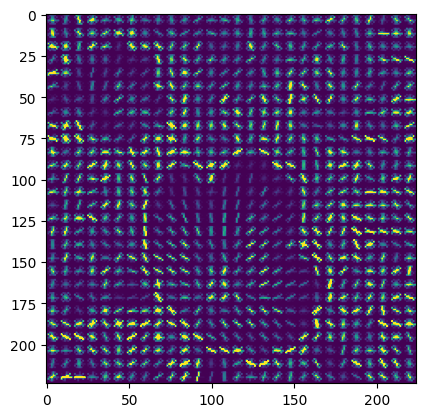

In [17]:
plt.imshow(img_hogg,norm=NoNorm())

In [18]:
#trích đặc trưng cho tập train và test
feat_train=[]
for img in img_train:
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    feat_HOG=get_hog_features(gray)
    feat_train.append(feat_HOG)

feat_test=[]
for img in img_test:
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    feat_HOG=get_hog_features(gray)
    feat_test.append(feat_HOG)

# chuyên qua kiểu numpy
X_hog_tr=np.array(feat_train)
Y_tr=np.array(label_train)
X_hog_te=np.array(feat_test)
Y_te=np.array(label_test)

In [19]:
print("train data: " + str(X_hog_tr.shape))
print("train label: " + str(Y_tr.shape))

print("test data: " + str(X_hog_te.shape))
print("test label: " + str(Y_te.shape))

train data: (5614, 26244)
train label: (5614,)
test data: (2575, 26244)
test label: (2575,)


In [20]:
# Huấn luyện SVM
from sklearn.svm import SVC, LinearSVC
model_svm = SVC(kernel="linear", C=1.0)
model_svm.fit(X_hog_tr,Y_tr)

SVC(kernel='linear')

In [21]:
# Kiểm thử mô hình SVM
y_predict = model_svm.predict(X_hog_te)
print ('Độ chính xác: ',model_svm.score(X_hog_te,Y_te))

Độ chính xác:  0.21436893203883495


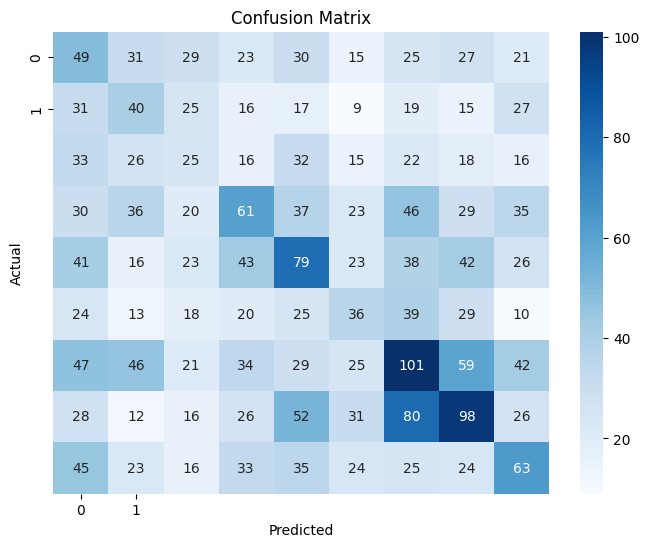

F1 Score: 0.20562485785766227
Accuracy Score: 0.21436893203883495
Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.20      0.17       250
           2       0.16      0.20      0.18       199
           3       0.13      0.12      0.13       203
           4       0.22      0.19      0.21       317
           5       0.24      0.24      0.24       331
           6       0.18      0.17      0.17       214
           7       0.26      0.25      0.25       404
           8       0.29      0.27      0.28       369
           9       0.24      0.22      0.23       288

    accuracy                           0.21      2575
   macro avg       0.21      0.21      0.21      2575
weighted avg       0.22      0.21      0.22      2575



In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Dự đoán kết quả trên tập kiểm thử
y_predict = model_svm.predict(X_hog_te)

# Tính confusion matrix
cm = confusion_matrix(Y_te, y_predict)

# Hiển thị confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tính và hiển thị F1 score
f1 = f1_score(Y_te, y_predict, average='macro')
print('F1 Score:', f1)

# In độ chính xác và báo cáo phân loại
accuracy = accuracy_score(Y_te, y_predict)
print('Accuracy Score:', accuracy)
print('Classification Report:')
print(classification_report(Y_te, y_predict))